# Wizualizacje
W tym zadaniu przyjrzymy się trochę funkcjom formatującym wyniki.

W trakciezadania  pracowac bedziemy z zestawem danych dotyczacym degustacji wina z Uniwersytetu w [Kalifornii](https://archive.ics.uci.edu/ml/datasets/wine+quality)

Dane zostały przekształcone do pliku XLS, który znajduje się na platformie Github pod adresem:

In [ ]:
URL = "https://github.com/jakubrybacki/Karowa_Python_Introduction/blob/main/Zbiory%20cwiczen%20pandas/Zadanie%202%20-%20testy%20statystyczne/DaneWino.xlsx?raw=true"

## Polecenie 1:
Zaimportuj bibliotekę pandas. Wykorzystaj adres URL u góry do wczytania informacji do ramki danych. Wyświetl sturkturę pliku.

In [ ]:
import pandas as pd

dane = pd.read_excel(URL)
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Polecenie 2:
Wyświetl macierz korelacji między zmiennymi. Które zmienne są ze sobą mocno skorelowane?

In [ ]:
dane.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


# Polecenie 3:
Pojawia się mały problem. Zmiennych jest dużo, a wyniki brzydko sformatowane. Musimy to poprawić. W pierwszej kolejności ustawmy 2 miejsca po *przecinku*

Pomoże nam komenda style i drobny [samouczek](https://pandas.pydata.org/docs/user_guide/style.html)

In [ ]:
korelacja = dane.corr()
korelacja.style.format(precision=2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04


Następnie podświetlmy sobie największe i najmniejsze korelacje. Do tego posłuży nam metoda *background_gradient*.

In [ ]:
korelacja.style.format(precision=2).background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10,-0.08
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04,-0.27
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01,0.09
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36,-0.04
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26,-0.20
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18,0.06
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27,-0.04
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69,-0.31
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12,0.02
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00,0.04


# Polecenie 4:
Wygląd tabel w *pandas* jest mało imponujący. Jeżeli coś jest zaprojektowane tutaj, to jego upiększenie znajdzie się w bibliotece *seaborn*.

Spróbujmy zrobić taką wizualizację jak w [tutorialu](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

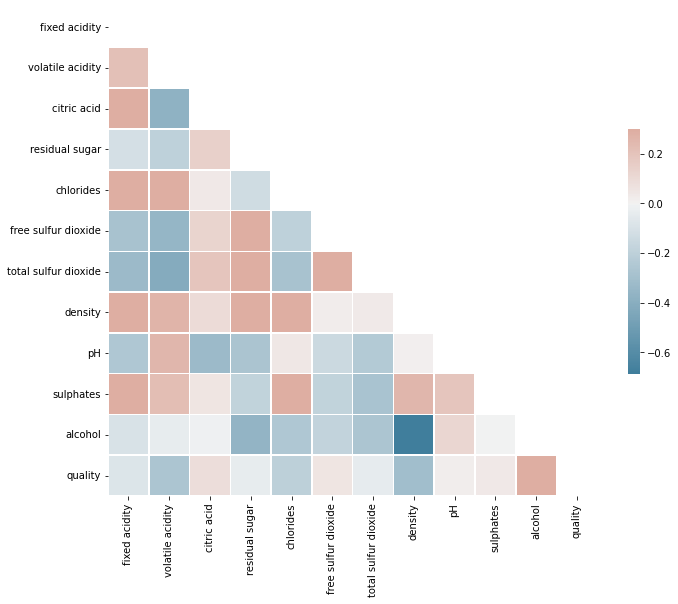

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = korelacja

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Polecenie 5:
Na koniec ciekawostka - wszystkie przeliczenia, których dokonujemy mogą być wyeksportowane do języka HTML, LATEX (matematyka przy PDFach) bądź Markdown (notatnik R)

In [ ]:
korelacja.to_latex()

'\\begin{tabular}{lrrrrrrrrrrrr}\n\\toprule\n{} &  fixed acidity &  volatile acidity &  citric acid &  residual sugar &  chlorides &  free sulfur dioxide &  total sulfur dioxide &   density &        pH &  sulphates &   alcohol &   quality \\\\\n\\midrule\nfixed acidity        &       1.000000 &          0.219008 &     0.324436 &       -0.111981 &   0.298195 &            -0.282735 &             -0.329054 &  0.458910 & -0.252700 &   0.299568 & -0.095452 & -0.076743 \\\\\nvolatile acidity     &       0.219008 &          1.000000 &    -0.377981 &       -0.196011 &   0.377124 &            -0.352557 &             -0.414476 &  0.271296 &  0.261454 &   0.225984 & -0.037640 & -0.265699 \\\\\ncitric acid          &       0.324436 &         -0.377981 &     1.000000 &        0.142451 &   0.038998 &             0.133126 &              0.195242 &  0.096154 & -0.329808 &   0.056197 & -0.010493 &  0.085532 \\\\\nresidual sugar       &      -0.111981 &         -0.196011 &     0.142451 &        1.000000

\begin{array}{lrrrrrrrrrrrr}
{} &  fixed acidity &  volatile acidity &  citric acid &  residual sugar &  chlorides &  free sulfur dioxide &  total sulfur dioxide &   density &        pH &  sulphates &   alcohol &   quality \\
fixed acidity        &       1.000000 &          0.219008 &     0.324436 &       -0.111981 &   0.298195 &            -0.282735 &             -0.329054 &  0.458910 & -0.252700 &   0.299568 & -0.095452 & -0.076743 \\
volatile acidity     &       0.219008 &          1.000000 &    -0.377981 &       -0.196011 &   0.377124 &            -0.352557 &             -0.414476 &  0.271296 &  0.261454 &   0.225984 & -0.037640 & -0.265699 \\
citric acid          &       0.324436 &         -0.377981 &     1.000000 &        0.142451 &   0.038998 &             0.133126 &              0.195242 &  0.096154 & -0.329808 &   0.056197 & -0.010493 &  0.085532 \\
residual sugar       &      -0.111981 &         -0.196011 &     0.142451 &        1.000000 &  -0.128940 &             0.402871 &              0.495482 &  0.552517 & -0.267320 &  -0.185927 & -0.359415 & -0.036980 \\
chlorides            &       0.298195 &          0.377124 &     0.038998 &       -0.128940 &   1.000000 &            -0.195045 &             -0.279630 &  0.362615 &  0.044708 &   0.395593 & -0.256916 & -0.200666 \\
free sulfur dioxide  &      -0.282735 &         -0.352557 &     0.133126 &        0.402871 &  -0.195045 &             1.000000 &              0.720934 &  0.025717 & -0.145854 &  -0.188457 & -0.179838 &  0.055463 \\
total sulfur dioxide &      -0.329054 &         -0.414476 &     0.195242 &        0.495482 &  -0.279630 &             0.720934 &              1.000000 &  0.032395 & -0.238413 &  -0.275727 & -0.265740 & -0.041385 \\
density              &       0.458910 &          0.271296 &     0.096154 &        0.552517 &   0.362615 &             0.025717 &              0.032395 &  1.000000 &  0.011686 &   0.259478 & -0.686745 & -0.305858 \\
pH                   &      -0.252700 &          0.261454 &    -0.329808 &       -0.267320 &   0.044708 &            -0.145854 &             -0.238413 &  0.011686 &  1.000000 &   0.192123 &  0.121248 &  0.019506 \\
sulphates            &       0.299568 &          0.225984 &     0.056197 &       -0.185927 &   0.395593 &            -0.188457 &             -0.275727 &  0.259478 &  0.192123 &   1.000000 & -0.003029 &  0.038485 \\
alcohol              &      -0.095452 &         -0.037640 &    -0.010493 &       -0.359415 &  -0.256916 &            -0.179838 &             -0.265740 & -0.686745 &  0.121248 &  -0.003029 &  1.000000 &  0.444319 \\
quality              &      -0.076743 &         -0.265699 &     0.085532 &       -0.036980 &  -0.200666 &             0.055463 &             -0.041385 & -0.305858 &  0.019506 &   0.038485 &  0.444319 &  1.000000 \\
\end{array}
